In [2]:
# install.packages("arules")
# install.packages("arulesViz")

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpEXWcKI\downloaded_packages


also installing the dependencies 'mclust', 'flexmix', 'prabclus', 'diptest', 'trimcluster', 'gridExtra', 'fpc', 'viridis', 'TSP', 'qap', 'gclus', 'dendextend', 'registry', 'irlba', 'crosstalk', 'scatterplot3d', 'seriation', 'igraph', 'DT', 'plotly'



package 'mclust' successfully unpacked and MD5 sums checked
package 'flexmix' successfully unpacked and MD5 sums checked
package 'prabclus' successfully unpacked and MD5 sums checked
package 'diptest' successfully unpacked and MD5 sums checked
package 'trimcluster' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'fpc' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'dendextend' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'irlba' successfully unpacked and MD5 sums checked
package 'crosstalk' successfully unpacked and MD5 sums checked
package 'scatterplot3d' successfully unpacked and MD5 sums checked
package 'seriation' su

In [2]:
library(arules)
library(arulesViz)
# library(datasets)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: grid


     lhs                      rhs      support confidence lift     
[1]  {laptop}              => {mobile} 0.125   1.0000000  1.6000000
[2]  {headset,laptop}      => {mobile} 0.125   1.0000000  1.6000000
[3]  {charger,pad}         => {mobile} 0.125   1.0000000  1.6000000
[4]  {charger,headset,pad} => {mobile} 0.125   1.0000000  1.6000000
[5]  {charger}             => {mobile} 0.250   0.6666667  1.0666667
[6]  {pad}                 => {mobile} 0.250   0.6666667  1.0666667
[7]  {headset,pad}         => {mobile} 0.250   0.6666667  1.0666667
[8]  {}                    => {mobile} 0.625   0.6250000  1.0000000
[9]  {headset}             => {mobile} 0.500   0.5714286  0.9142857
[10] {charger,headset}     => {mobile} 0.125   0.5000000  0.8000000


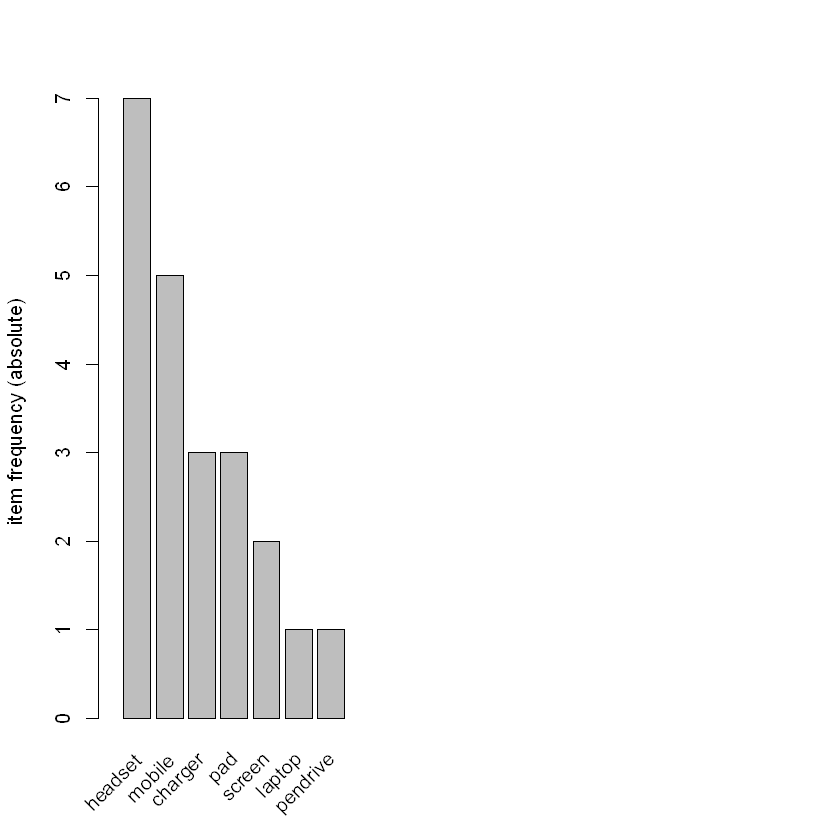

In [3]:
# w1 = read.table("C:/Users/sbgowtham/Desktop/comm.csv")
w1 = read.table("data//retail.csv")

# trans = read.transactions("C:/Users/sbgowtham/Desktop/comm.csv", format = "basket", sep=",");
trans = read.transactions("data//retail.csv", format = "basket", sep=",");

itemFrequencyPlot(trans,topN=20,type="absolute")


rules<-apriori(data=trans, parameter=list(supp=0.001,conf = 0.08), 
appearance = list(default="lhs",rhs="mobile"),control = list(verbose=F))

rules<-sort(rules, decreasing=TRUE,by="confidence")


inspect(rules[1:10])


plot(rules,method="graph",interactive=TRUE,shading=NA)

* Market Basket Analysis is for the retailers to identify relationships between the items that people buy.

* Association Rules is widely used to analyze retail basket or transaction data

An Example of Association Rules Assume there are 100 customers 10 out of them bought milk, 8 bought butter and 6 bought both of them.
>bought milk => bought butter  
Support = P(Milk & Butter) = 6/100 = 0.06  
confidence = support/P(Butter) = 0.06/0.08 = 0.75  
lift = confidence/P(Milk) = 0.75/0.10 = 7.5  

Online Retail dataset from UCI Machine Learning repository's   
http://archive.ics.uci.edu/ml/datasets/online+retail  

In [1]:
install.packages("tidyverse")
install.packages("plyr")

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpK8ia4z\downloaded_packages
package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpK8ia4z\downloaded_packages


In [2]:
# Load the packages
library(tidyverse)
library(readxl)
library(ggplot2)
library(lubridate)
library(arules)
library(arulesViz)
library(plyr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand


Attaching package: 'arules'

The following object is masked from 'package:dplyr':

    recode

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: grid
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
----------------------------

### Data preprocessing and exploring

In [4]:
retail <- read_excel('data/Online Retail.xlsx')
retail <- retail[complete.cases(retail), ]
retail <- retail %>% mutate(Description = as.factor(Description))
retail <- retail %>% mutate(Country = as.factor(Country))
retail$Date <- as.Date(retail$InvoiceDate)
retail$Time <- format(retail$InvoiceDate,"%H:%M:%S")
retail$InvoiceNo <- as.numeric(as.character(retail$InvoiceNo))
glimpse(retail)
str(retail)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

Observations: 406,829
Variables: 10
$ InvoiceNo   <dbl> 536365, 536365, 536365, 536365, 536365, 536365, 536365,...
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752...
$ Description <fctr> WHITE HANGING HEART T-LIGHT HOLDER, WHITE METAL LANTER...
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, ...
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 0...
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1...
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850,...
$ Country     <fctr> United Kingdom, United Kingdom, United Kingdom, United...
$ Date        <date> 2010-12-01, 2010-12-01, 2010-12-01, 2010-12-01, 2010-1...
$ Time        <chr> "08:26:00", "08:26:00", "08:26:00", "08:26:00", "08:26:...
Classes 'tbl_df', 'tbl' and 'data.frame':	406829 obs. of  10 variables:
 $ InvoiceNo  : num  536365 536365 536365 536365 536365 ...
 $ StockCode  : chr  "85123A" "71053" "844

### What time do people often purchase online?

In [ ]:
retail$Time <- as.factor(retail$Time)
a <- hms(as.character(retail$Time))
retail$Time = hour(a)

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

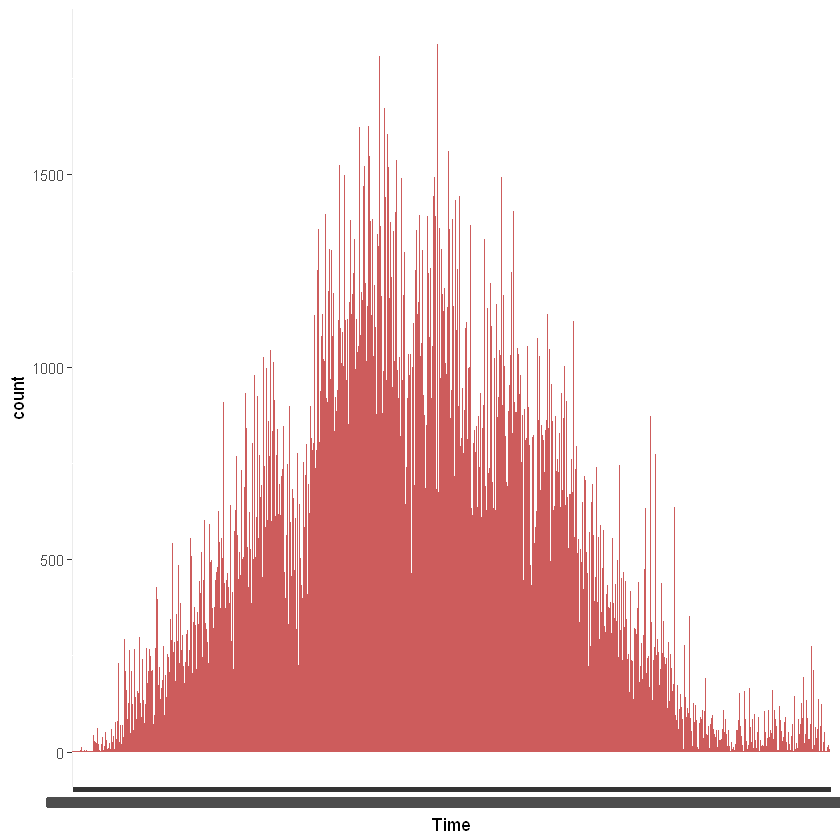

In [7]:
retail %>% 
  ggplot(aes(x=Time)) + 
  geom_histogram(stat="count",fill="indianred")
# There is a clear effect of hour of day on order volume. Most orders happened between 11:00-15:00.

https://bit.ly/2xFRaS3  